In [1]:
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/317.2 MB ? eta -:--:--
     ---------------------------------------- 0.8/317.2 MB 4.8 MB/s eta 0:01:06
     ---------------------------------------- 3.4/317.2 MB 9.1 MB/s eta 0:00:35
      -------------------------------------- 6.0/317.2 MB 10.2 MB/s eta 0:00:31
     - ------------------------------------- 8.7/317.2 MB 11.0 MB/s eta 0:00:29
     - ------------------------------------ 11.3/317.2 MB 11.4 MB/s eta 0:00:27
     - ------------------------------------ 13.9/317.2 MB 11.6 MB/s eta 0:00:27
     -- ----------------------------------- 16.8/317.2 MB 11.7 MB/s eta 0:00:26
     -- ----------------------------------- 19.4/317.2 MB 12.0 MB/s eta 0:00:25
     -- ----------------------------------- 21.0/317.2 MB 11.7 MB/s eta 0:00:26
     -- ----------------------------------- 23.3/317.2 MB 11.4 MB/s eta 0:00:26
     --- ---------------------------------- 25.7/


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


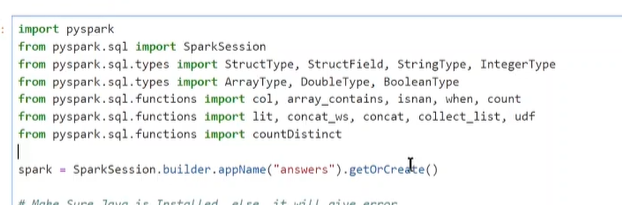

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("answers").getOrCreate()

In [5]:
path = "./../../Dataset/web-Google.txt"
df = spark.read.option("header", "True").option('delimiter', '\t').csv(path)
df.printSchema()

root
 |-- FromNodeId: string (nullable = true)
 |-- ToNodeId: string (nullable = true)



In [6]:
df.show()

+----------+--------+
|FromNodeId|ToNodeId|
+----------+--------+
|         0|   11342|
|         0|  824020|
|         0|  867923|
|         0|  891835|
|     11342|       0|
|     11342|   27469|
|     11342|   38716|
|     11342|  309564|
|     11342|  322178|
|     11342|  387543|
|     11342|  427436|
|     11342|  538214|
|     11342|  638706|
|     11342|  645018|
|     11342|  835220|
|     11342|  856657|
|     11342|  867923|
|     11342|  891835|
|    824020|       0|
|    824020|   91807|
+----------+--------+
only showing top 20 rows



In [13]:
# Convert string to integer
from pyspark.sql.types import StructType, IntegerType

schema = StructType() \
    .add("FromNodeId", IntegerType(), True) \
    .add("ToNodeId", IntegerType(), True) \
                
df_with_schema = spark.read.format("csv") \
    .option("header", True) \
    .option("delimiter", "\t") \
    .schema(schema).load(path) 
                        

In [15]:

df_with_schema.printSchema()

root
 |-- FromNodeId: integer (nullable = true)
 |-- ToNodeId: integer (nullable = true)



In [20]:
from pyspark.sql.functions import col
# Null value analysis
df_with_schema.filter(col("FromNodeId").isNull()).show()

+----------+--------+
|FromNodeId|ToNodeId|
+----------+--------+
+----------+--------+



In [21]:
df_with_schema.filter(col("ToNodeId").isNull()).show()

+----------+--------+
|FromNodeId|ToNodeId|
+----------+--------+
+----------+--------+



In [25]:
# Filling null values
df_with_schema.na.fill({"FromNodeId": 50000, "ToNodeId": 124}).show()

+----------+--------+
|FromNodeId|ToNodeId|
+----------+--------+
|         0|   11342|
|         0|  824020|
|         0|  867923|
|         0|  891835|
|     11342|       0|
|     11342|   27469|
|     11342|   38716|
|     11342|  309564|
|     11342|  322178|
|     11342|  387543|
|     11342|  427436|
|     11342|  538214|
|     11342|  638706|
|     11342|  645018|
|     11342|  835220|
|     11342|  856657|
|     11342|  867923|
|     11342|  891835|
|    824020|       0|
|    824020|   91807|
+----------+--------+
only showing top 20 rows



## Filtering

In [29]:
df_with_schema.filter((df_with_schema["FromNodeId"] > 80) & (df_with_schema["ToNodeId"] > 2000)).show(5)

+----------+--------+
|FromNodeId|ToNodeId|
+----------+--------+
|     11342|   27469|
|     11342|   38716|
|     11342|  309564|
|     11342|  322178|
|     11342|  387543|
+----------+--------+
only showing top 5 rows



In [30]:
df_with_schema.filter((df_with_schema["FromNodeId"] > 80) & (df_with_schema["ToNodeId"] > 2000)).select("FromNodeId").show(5)

+----------+
|FromNodeId|
+----------+
|     11342|
|     11342|
|     11342|
|     11342|
|     11342|
+----------+
only showing top 5 rows



In [33]:
df_with_schema.filter((df_with_schema["FromNodeId"] >= 25) & \
                        (df_with_schema["ToNodeId"] >= 20)) \
                        .orderBy(["FromNodeId", "ToNodeId"], ascending = False).show(5)

+----------+--------+
|FromNodeId|ToNodeId|
+----------+--------+
|    916427|  910217|
|    916427|  843844|
|    916427|  734372|
|    916427|  720599|
|    916427|  558211|
+----------+--------+
only showing top 5 rows



In [35]:
from pyspark.sql.functions import lit
# Create a new column
df_with_schema.withColumn("rank_for_ToNodeId", lit(1.0)).show()

+----------+--------+-----------------+
|FromNodeId|ToNodeId|rank_for_ToNodeId|
+----------+--------+-----------------+
|         0|   11342|              1.0|
|         0|  824020|              1.0|
|         0|  867923|              1.0|
|         0|  891835|              1.0|
|     11342|       0|              1.0|
|     11342|   27469|              1.0|
|     11342|   38716|              1.0|
|     11342|  309564|              1.0|
|     11342|  322178|              1.0|
|     11342|  387543|              1.0|
|     11342|  427436|              1.0|
|     11342|  538214|              1.0|
|     11342|  638706|              1.0|
|     11342|  645018|              1.0|
|     11342|  835220|              1.0|
|     11342|  856657|              1.0|
|     11342|  867923|              1.0|
|     11342|  891835|              1.0|
|    824020|       0|              1.0|
|    824020|   91807|              1.0|
+----------+--------+-----------------+
only showing top 20 rows



## GroupBy and aggregation

In [36]:
df_with_schema.groupBy("FromNodeId").agg({"ToNodeId": "max"}).show(5)

+----------+-------------+
|FromNodeId|max(ToNodeId)|
+----------+-------------+
|     75039|       877041|
|    274848|       891240|
|    476667|       639662|
|    776354|       772466|
|    146581|       900256|
+----------+-------------+
only showing top 5 rows



## Find all column names

In [37]:
df_with_schema.columns

['FromNodeId', 'ToNodeId']

In [38]:
import pandas as pd
df_with_schema.toPandas().head()

,FromNodeId,ToNodeId
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0
